# Lab 1: Introduction


# Part 1: Using Numpy

In [ ]:
import numpy as np # import numpy

## Creating n-dimensional numpy arrays from Python lists

In [ ]:
# Defining a numpy array 

# 1D array
arr = np.array([1,2,3,4,5]) 

# 2D array
arr_2d = np.array([[1,2,3,4,5],
                  [6,7,8,9,10],
                  [11,12,13,14,15]])

# 3D array
arr_3d = np.array([[[1,2,3,4,5],
                  [6,7,8,9,10],
                  [11,12,13,14,15]],
                   [[16,17,18,19,20],
                  [21,22,23,24,25],
                  [26,27,28,29,30]]])

print(arr, arr.shape) # Prints the array and its dimensions
print(arr_2d, arr_2d.shape)
print(arr_3d, arr_3d.shape)

print(type(arr))      # Numpy array has 'numpy.ndarray' type

## Creating numpy arrays from numpy commands

In [ ]:
# Define number of each dimension 

n1 = 3
n2 = 4
n3 = 5

# Zeros array
zeros_1d = np.zeros(n1)
zeros_2d = np.zeros((n1,n2)) 
zeros_3d = np.zeros((n1,n2,n3))

# Ones array
ones_1d = np.ones(n1)
ones_2d = np.ones((n1,n2))
ones_3d = np.ones((n1,n2,n3))

# Creating array using np.arange
arr_arange = np.arange(0, 10, 1)     # (start, stop, stepsize)

# Creating an array using np.linspace
arr_linspace = np.linspace(0, 9, 10) # (start, stop, # of bins)

print(zeros_2d)
print(ones_2d)
print(arr_arange)
print(arr_linspace)

In [ ]:
# Random array

np.random.seed(10)                 # Fixes the seed number so that random samplings always give same results

rand_arr = np.random.randn(n1, n2) # Random array sampled from standard normal distribution 
print(rand_arr)

## Matrix operations in Numpy

In [ ]:
# Elementwise Addition
twos_2d = np.add(ones_2d, ones_2d)
print(twos_2d)

In [ ]:
# Elementwise Subtraction
fives_2d = ones_2d * 5
print(np.subtract(fives_2d, twos_2d))
print(fives_2d - 2) #alternative method

In [ ]:
# Elementwise Multiplication
print(np.multiply(fives_2d, twos_2d))

In [ ]:
# Elementwise Division
print(np.divide(fives_2d, twos_2d))

In [ ]:
# Dot product
A = ones_2d.copy()
b = np.arange(0, 4, 1)
print(np.dot(A, b))

In [ ]:
# Elementwise Power 
print(np.power(twos_2d, 3)) #(array to be powered, power constant)

In [ ]:
# Transpose
print(ones_2d)
print(ones_2d.T)             # method 1
print(np.transpose(ones_2d)) # method 2

## Useful Numpy functions

In [ ]:
# np.concatenate

print(np.concatenate([ones_1d, zeros_1d])) # Concatenation between 1D arrays joins them into a single array

In [ ]:
# np.stack (vstack and hstack)

print(np.stack([ones_2d, twos_2d]))  # np.stack([2D, 2D]) outputs 3D array
print(np.hstack([ones_2d, twos_2d])) # np.hstack([2D, 2D]) outputs horizontally stacked 2D arrays 
print(np.vstack([ones_2d, twos_2d])) # np.vstack([2D, 2D]) outputs vertically stacked 2D arrays

In [ ]:
# np.min, np.max, np.mean, np.sum

arr = np.arange(10) # 0 to 9

print(np.min(arr))  # minimum value of the array
print(np.max(arr))  # maximum value of the array
print(np.mean(arr)) # mean value of the array
print(np.sum(arr))  # summation of all the elements

In [ ]:
# np.argmin, np.argmax, np.argsort

print(np.argmin(arr))  # Finds the index corresponding to minimum value
print(np.argmax(arr))  # Finds the index corresponding to maximum value

np.random.shuffle(arr) # Shuffles the array
print(arr)             # Shuffled array

print(np.argsort(arr)) # Sorts the array indices from the smallest to the largest value

In [ ]:
# np.where

print(np.where(arr == 7)) # Finds the specific indicies in the array that satisfies the condition
print(np.where(arr >= 7)) # Another example using inequality

# Part 2: Plotting Data

In [ ]:
#%matplotlib inline   # If using local notebook runtime, allows you to display the plot inside the jupyter notebook
#%matplotlib notebook # Alternatively, you can use this line instead for interactive plots

import matplotlib.pyplot as plt

## Basic plotting

In [ ]:
x = np.arange(0, 10, 1/32) # x axis data
y = np.sin(x)              # y axis data
plt.plot(x, y)             # plot the data

## Labeling your plots

In [ ]:
plt.plot(x, y) 
plt.title('y=sin(x)')  # set the title
plt.xlabel('x')        # set the x axis label
plt.ylabel('y')        # set the y axis label
plt.xlim(-1, 11)       # set the x axis range
plt.ylim(-2, 2)        # set the y axis range
plt.grid()             # enable the grid

## Multiple plots

In [ ]:
# Multiple Plots
# On same figure 
x = np.arange(0, 10, 1/32) # x axis data
y1 = np.sin(x)             # y axis data 1
y2 = np.cos(x)             # y axis data 2
y3 = np.tan(x)             # y axis data 3
plt.figure(1)              # create figure 1
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='cos(x)')
plt.plot(x, y3, label='tan(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 11)
plt.ylim(-2, 2)
plt.suptitle('Trigonometric Functions')
plt.legend()
plt.show()


## Creating subplots

In [ ]:
# Multiple Subplots
x = np.arange(0, 10, 1/32) # x axis data
y1 = np.sin(x)             # y axis data for subplot 1
y2 = np.cos(x)             # y axis data for subplot 2
y3 = np.tan(x)             # y axis data for subplot 3

fig = plt.figure(2,figsize=(8,8)) # create figure 2

plt.subplot(311)           # (number of rows, number of columns, current plot)
plt.plot(x, y1)
plt.title('sin(x)')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(312)
plt.plot(x, y2)
plt.title('cos(x)')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(313)
plt.plot(x, y3)
plt.title('tan(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1, 1)

fig.tight_layout()

# Part 3: Working with data


In [ ]:
import pandas as pd
import sklearn

# Import necessary modules
from sklearn.linear_model import LogisticRegressionCV

diabetes = pd.read_csv('diabetes.csv') # Read the dataset with pandas
diabetes.head() # Display the head of the data

In [ ]:
# Scaling the data

X1 = diabetes.values[:, :-1]                                              # Extract features
Y1 = diabetes.values[:, -1]                                               # Extract labels

# Scale the data z = (x - u) / s

X1_mean = np.mean(X1, axis = 0)                                           # Compute means
X1_std = np.std(X1, axis = 0)                                             # Compute stds
X1_mean_repeated = np.tile(X1_mean, (len(X1), 1))                         # Create repeated array of mean to match X1 dimension
X1_std_repeated = np.tile(X1_std, (len(X1), 1))                           # Create repeated array of std to match X1 dimension
X1_scaled = np.divide(np.subtract(X1, X1_mean_repeated), X1_std_repeated) # Compute z for the array

In [ ]:
# Divide the data into training and testing

test_ratio = 0.3                              # Set the test data ratio
train_size = int(len(X1)*(1-test_ratio))      # Set training data size based on test ratio

X_train = X1_scaled[:train_size]              
X_test = X1_scaled[train_size:]
Y_train = Y1[:train_size]
Y_test = Y1[train_size:]

In [ ]:
# Use cross validation to train
model = LogisticRegressionCV(cv=10).fit(X_train, Y_train)
result = model.score(X_test, Y_test)

print("Accuracy: %.2f%%" % (result*100))

# Lab Assignment: Implement Neural Network for XOR gate from scratch 


In [23]:
# XOR table
import pandas as pd, numpy as np, matplotlib.pyplot as plt
XOR_table = pd.read_csv('XOR_table.csv')
XOR_table

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


![](https://drive.google.com/uc?export=view&id=1lf82hKZxfBqhV2m5cLIRO_9pO1S3T4ty)

In [24]:
XOR_table = XOR_table.values
X_values = XOR_table[:, :2]
X = X_values[0:2]
targets = XOR_table[0:2,-1].reshape(-1,1)

print(X)       # Input data
print(targets) # Output targets

[[0 0]
 [0 1]]
[[0]
 [1]]


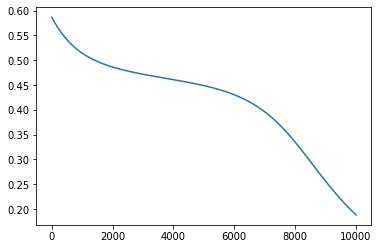

In [27]:
# First set a seed for consistent results
np.random.seed(5)

# Define dimensions on input, hidden and output layers
# There are two input neurons, two in hidden layer, and one output
input_dim, hidden_dim, output_dim = 2,2,1

# Define learning rate
learning_rate=0.01

# Define a hidden layer
# We'll use a random distribution
# W1=np.random.randn(input_dim, hidden_dim)
W1 = np.random.normal(0,1,(hidden_dim, input_dim))
# Define an output layer
# W2=np.random.randn(hidden_dim, output_dim)
W2 = np.random.normal(0,1,(hidden_dim, output_dim))

# Define sigmoid activation function
# if deriv = True, returns the derivative instead
def sigmoid(x, deriv=False):
  if deriv:
    return x*(1-x)
  else:
    return 1/(1+np.exp(-x))

# Define loss function
def loss(y,t):
  return (y-t)**2

# define empty array to store loss function output
loss_vals = []

for i in range(10000):

  # Forward pass: compute predicted y
  z = sigmoid(np.dot(X,W1))
  y = sigmoid(np.dot(z,W2))

  # Compute and print L2-norm loss
  #print(loss(y,targets))
  #print(y)

  # Backprop to compute gradients of w1 and w2 with respect to L2-norm loss
  error = 2*(y-targets)
  grad_w2 = np.dot((error*sigmoid(y, deriv=True)).T, z).T

  g1 = np.dot(error*sigmoid(y,deriv=True), W2.T)
  g2 = sigmoid(z, deriv=True)*X
  grad_w1 = np.dot(g1.T, g2)

  # Update weights
  W1 -= learning_rate*grad_w1
  W2 -= learning_rate*grad_w2

  # Save loss to an array
  loss_vals.append(np.sum(loss(y,targets)))

%matplotlib inline
plt.plot(loss_vals)

In [317]:
 g1 = np.dot(error*sigmoid(y,deriv=True), W2.T)
g2 = sigmoid(z, deriv=True)*X

In [28]:
y

array([[0.34851659],
       [0.7416797 ]])

In [215]:
def loss(y,t):
  return np.sum(np.power(y-t,2))

loss_vals = []
# First set a seed for consistent results
np.random.seed(563)

# Define dimensions on input, hidden and output layers
input_dim, hidden_dim, output_dim = 2,2,1

# Define learning rate
learning_rate=0.2

# Define a hidden layer
# We'll use a random distribution
W1=np.random.randn(input_dim, hidden_dim)
# Define an output layer
W2=np.random.randn(hidden_dim, output_dim)

# Forward pass: compute predicted y
z = sigmoid(np.dot(X,W1))
y = sigmoid(np.dot(z,W2))

# Compute and print L2-norm loss
# print(loss(y,targets))
print(y)

# Backprop to compute gradients of w1 and w2 with respect to L2-norm loss
f1 = 2*(y-targets)*y*(1-y)
grad_w2 = np.dot(f1.T, z).T

g1 = np.dot((2*(y-targets)*y*(1-y)).T,W2)
g2 = z*(1-z)*X
grad_w1 = np.dot(g1,g2)

# Update weights
W1 = W1-learning_rate*grad_w1
W2 = W2-learning_rate*grad_w2
# Save loss to an array
loss_vals.append(loss(y,targets))


[[0.86347302]
 [0.76048742]
 [0.86793185]
 [0.77289826]]


In [353]:
X[:,0]

array([0, 0, 1, 1])

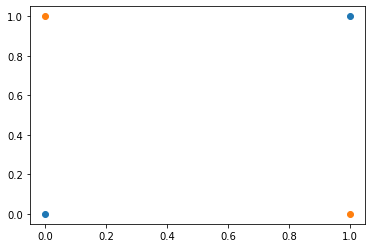

In [356]:
%matplotlib inline
XOR = pd.DataFrame({'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,1,1,0)})

plt.scatter([0,1],[0,1]);
plt.scatter([0,1], [1,0]);

In [167]:
g2

array([[0.18431368, 0.34264217],
       [0.20188596, 0.35686114]])

In [8]:
Xtr

array([[0, 0],
       [0, 1],
       [1, 0]])

In [18]:
 XOR_table[0:3,-1].reshape(-1,1)

array([[0],
       [1],
       [1]])